## 2D Gaussian figure

In this notebook I show how training points are selected from an MCMC chain of a 2D Gaussian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importance_sampler as isamp
import scipy.stats
import corner
%matplotlib inline

In [2]:
plt.rc("font", size=18, family="serif")
#plt.rc("text", usetex=True)

The next cell defines the mean and covariance matrix of the distribution.

In [3]:
means = np.array([3.0, 0.0, -2.])
stddevs = np.array([1.0, 0.1, 1.0]) #standard deviations
rho = 0.1 #correlation
cov = np.array([[stddevs[0]**2, -rho*stddevs[0]*stddevs[1], rho*stddevs[0]*stddevs[2]],
                [-rho*stddevs[0]*stddevs[1], stddevs[1]**2, -rho*stddevs[1]*stddevs[2]],
                [rho*stddevs[0]*stddevs[2], -rho*stddevs[1]*stddevs[2], stddevs[2]**2]])
icov = np.linalg.inv(cov)

In [4]:
# Draw many samples (i.e. a mock MCMC) and compute the likelihoods
N_samples = 100000
chain = np.random.multivariate_normal(mean=means, cov=cov, size=N_samples)
likes = scipy.stats.multivariate_normal.pdf(chain, mean=means, cov=cov)
lnlikes = np.log(likes)

In [5]:
# Create the importance sampler object from our chain and likelihoods,
# and select 1000 training points.
N_training = 1000
IS = isamp.ImportanceSampler(chain, lnlikes, scale = 10)
IS.select_training_points(N_training, method="LH")
x = IS.get_training_data()
IS.train()

Text(0,0.5,'$z$')

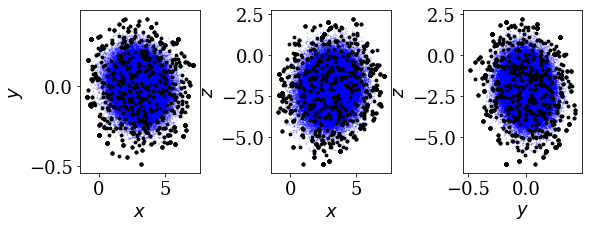

In [6]:
# Get the trainging points, and plot the chain as well as the training data
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(9,3))
plt.subplots_adjust(wspace=0.6)
ax[0].scatter(chain[:,0], chain[:,1], c='b', s=0.5, alpha=0.2)
ax[1].scatter(chain[:,0], chain[:,2], c='b', s=0.5, alpha=0.2)
ax[2].scatter(chain[:,1], chain[:,2], c='b', s=0.5, alpha=0.2)

points,_ = IS.get_training_data()
ax[0].scatter(points[:,0], points[:,1], c='k', s=8)
ax[1].scatter(points[:,0], points[:,2], c='k', s=8)
ax[2].scatter(points[:,1], points[:,2], c='k', s=8)

ax[0].set_xlabel(r"$x$")
ax[1].set_xlabel(r"$x$")
ax[2].set_xlabel(r"$y$")
ax[0].set_ylabel(r"$y$")
ax[1].set_ylabel(r"$z$")
ax[2].set_ylabel(r"$z$")
#plt.savefig("training_points.png", dpi=300, bbox_inches="tight")
#plt.savefig("training_points.pdf", dpi=300, bbox_inches="tight")